<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [173]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


## Getting Started
Datacamp already set up most imports needed for the project, imported the dataset and printed the head of the dataset to visualize it. The info of the DataFrame was viewed to check for any null values. One row was discovered to have null values in the CustomerType and Purchase columns and was dropped from the dataset. 

In [174]:
print(shopping_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

In [175]:
shopping_data[shopping_data['CustomerType'].isna()]

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
12054,12055,1,14.5,0,0.0,24,1277.842857,0.0,0.016074,0.0,0.0,True,N,NaN,NaN


In [176]:
shopping_data.dropna(inplace=True)
print(shopping_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12054 entries, 0 to 12053
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12054 non-null  int64  
 1   Administrative           12054 non-null  int64  
 2   Administrative_Duration  12054 non-null  float64
 3   Informational            12054 non-null  int64  
 4   Informational_Duration   12054 non-null  float64
 5   ProductRelated           12054 non-null  int64  
 6   ProductRelated_Duration  12054 non-null  float64
 7   BounceRates              12054 non-null  float64
 8   ExitRates                12054 non-null  float64
 9   PageValues               12054 non-null  float64
 10  SpecialDay               12054 non-null  float64
 11  Weekend                  12054 non-null  bool   
 12  Month                    12054 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

## Question 1: What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called `purchase_rates`.
The unique values of the 'Purchase' column were viewed to ensure they were in the correct format for the analysis. A new DataFrame titled `shopping_data_nov_dec` was then created including only data from November and December. The purchase rates for each customer type were then calculated, rounded to 3 decimal places, and stored in a dictionary titled `purchase_rates`

In [177]:
#View unique values in Purchase column
print(shopping_data['Purchase'].unique())

#Create a new df with only data from November and December
shopping_data_nov_dec= shopping_data[(shopping_data['Month'] == 'Nov') | (shopping_data['Month'] == 'Dec')]

#Create a DataFrame with purchase rates and round to 3 decimal places
purchase_rates_df = pd.DataFrame(shopping_data_nov_dec.groupby('CustomerType')['Purchase'].mean())
purchase_rates_df = purchase_rates_df.round(3)
print(purchase_rates_df)

[0. 1.]
                    Purchase
CustomerType                
New_Customer           0.273
Returning_Customer     0.196


In [178]:
#Create purchase_rates dictionary
purchase_rates = {'Returning_Customer': 0.196, 'New_Customer': 0.273}

## Question 2: What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called `top_correlation`.

       Administrative_Duration  Informational_Duration  ProductRelated_Duration
5464                 89.600000                   0.000              1721.906667
5467                204.200000                   0.000               652.376667
5479                  0.000000                   0.000               710.066667
5494                  0.000000                   0.000               968.692424
5497               1013.056909                 102.800              2697.022104
...                        ...                     ...                      ...
12049               141.916667                1060.750              8777.613879
12050               183.250000                  80.500              1883.444231
12051               297.833333                 290.225              1467.654221
12052                 0.000000                 407.500              1043.150000
12053                97.000000                 103.250              1509.500000

[3722 rows x 3 columns]
               

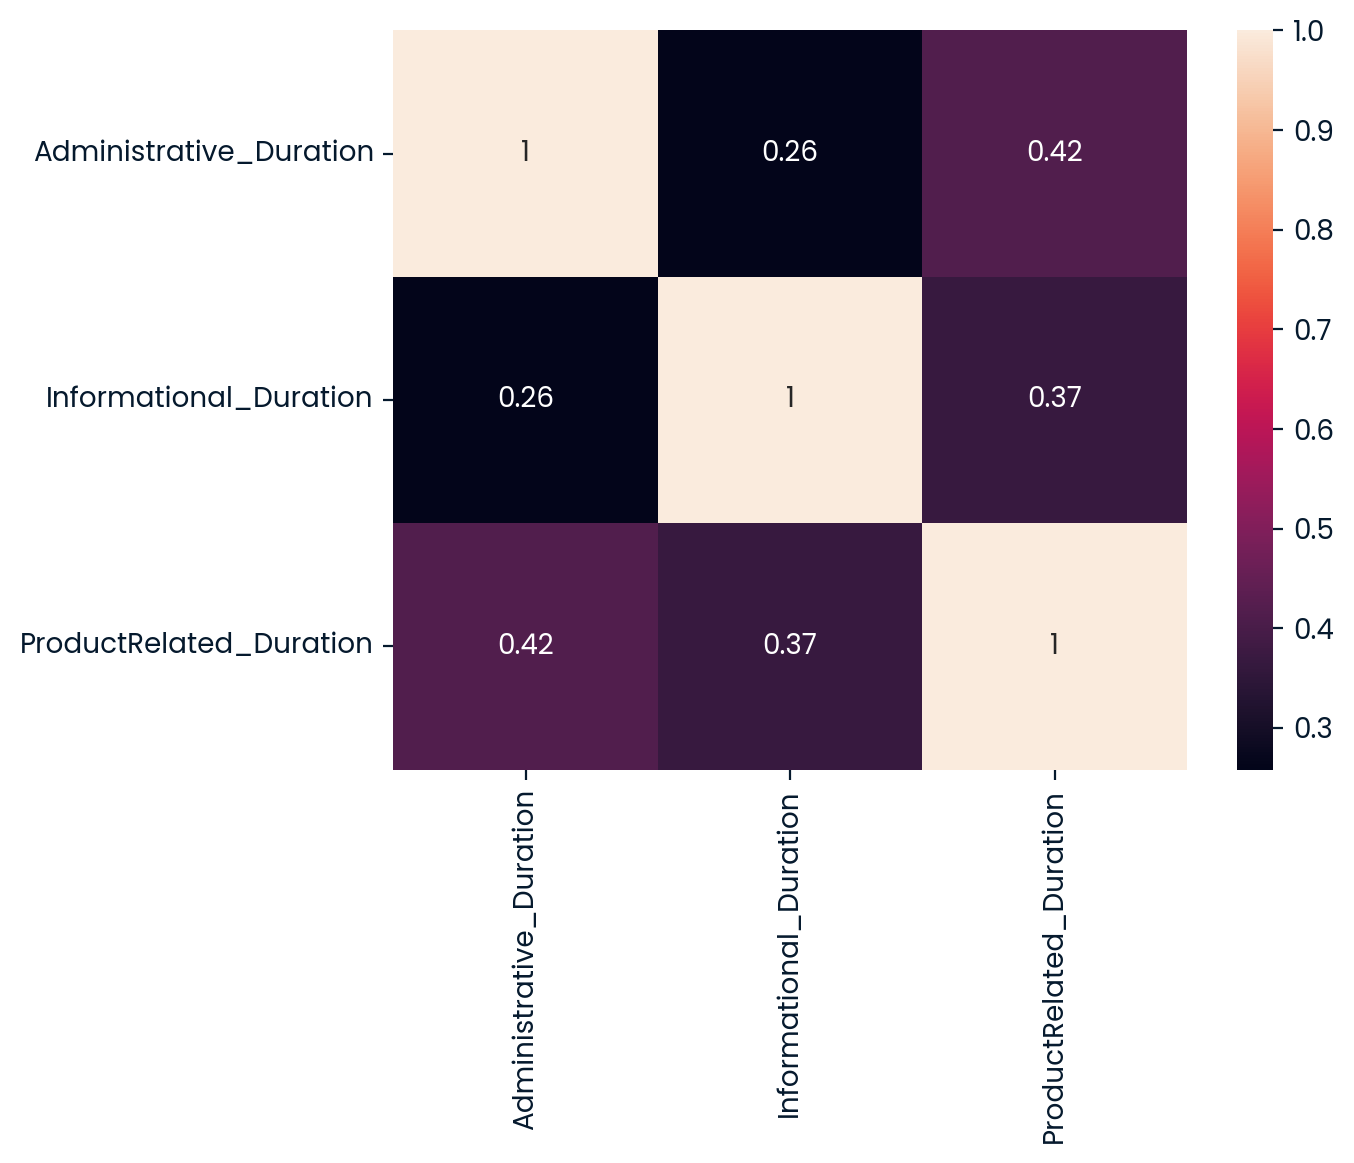

In [179]:
#Subset DataFrame to only include Duration columns and data in which the Customer is a Returning Customer
pre_corr_df = shopping_data_nov_dec[shopping_data_nov_dec['CustomerType'] == 'Returning_Customer'][['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

#Create a correlation matrix across the three durations, rouning to 3 decimal places
print(pre_corr_df)
corr_df = round(pre_corr_df.corr(), 3)
print(corr_df)

#Unstack the matrix and create a DataFrame with the correlations sorted by highest correlation to lowest
sorted_corr = corr_df.unstack().reset_index()
sorted_corr.columns = ['Duration_1', 'Duration_2', 'Correlation']
sorted_corr = sorted_corr.sort_values(by='Correlation', ascending=False).reset_index()

#Drop correlations between the same columns (e.g. Administrative_Duration vs Administrative_Duration))
indices_to_drop = sorted_corr[sorted_corr['Duration_1'] == sorted_corr['Duration_2']].index
sorted_corr.drop(indices_to_drop, inplace = True)

#Find the columns with the strongest correlation
print(sorted_corr[sorted_corr['Correlation'] == sorted_corr['Correlation'].max()])

#Create a heatmap to visualize the correlations
sns.heatmap(pre_corr_df.corr(), annot=True)
plt.show()

In [180]:
#Create top_correlation dictionary
top_correlation = {'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.417}

## Question 3: A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called `prob_at_least_100_sales`. Optional: plot a binomial probability distribution chart to visualize your chances.
The original DataFrame was subset to only contain Returning Customer data. The purchase rate of returning customers and the expected purchase rate of returning customers after the new campaign were calculated. The likelihood of achieving at least 100 sales out of 500 returning customers' online shopping sessions was calculated to be 1, so there is a 100% likelihood that at least 100 sales will occur out of 500 shopping sessions, assuming the increase in purchase rate is accurate. The binomial probability distribution was then plotted, showing the probability of getting x or more sales out of 500 online shopping sessions ranging from 50 sales to 200 sales. The likelihood of achieving up to at least 120 sales is roughly 1. The likelihood of achieving at least x amount of sales starts to drop off after this point, and becomes virtually 0 around at least 170 sales. 

In [181]:
#Subsetting original DataFrame to only contain Returning Customer data
shopping_data_return = shopping_data[shopping_data['CustomerType'] == 'Returning_Customer']

#Calculate the current Returning Customer purchase rate and new purchase rate after new campaign
return_cust_current_rate = shopping_data_return['Purchase'].mean()
return_cust_new_rate = return_cust_current_rate + 0.15
print(return_cust_new_rate)

#Calculate probability of achieving at least 100 sales out of 500 shopping sessions for returning customers after new campaign
from scipy.stats import binom
prob_at_least_100_sales = 1-(binom.cdf(100, 500, return_cust_new_rate))
print(prob_at_least_100_sales)

0.28874446370113616
0.9999962584577489


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.992, 0.916, 0.647, 0.271, 0.057, 0.005, 0.0, 0.0, 0.0]


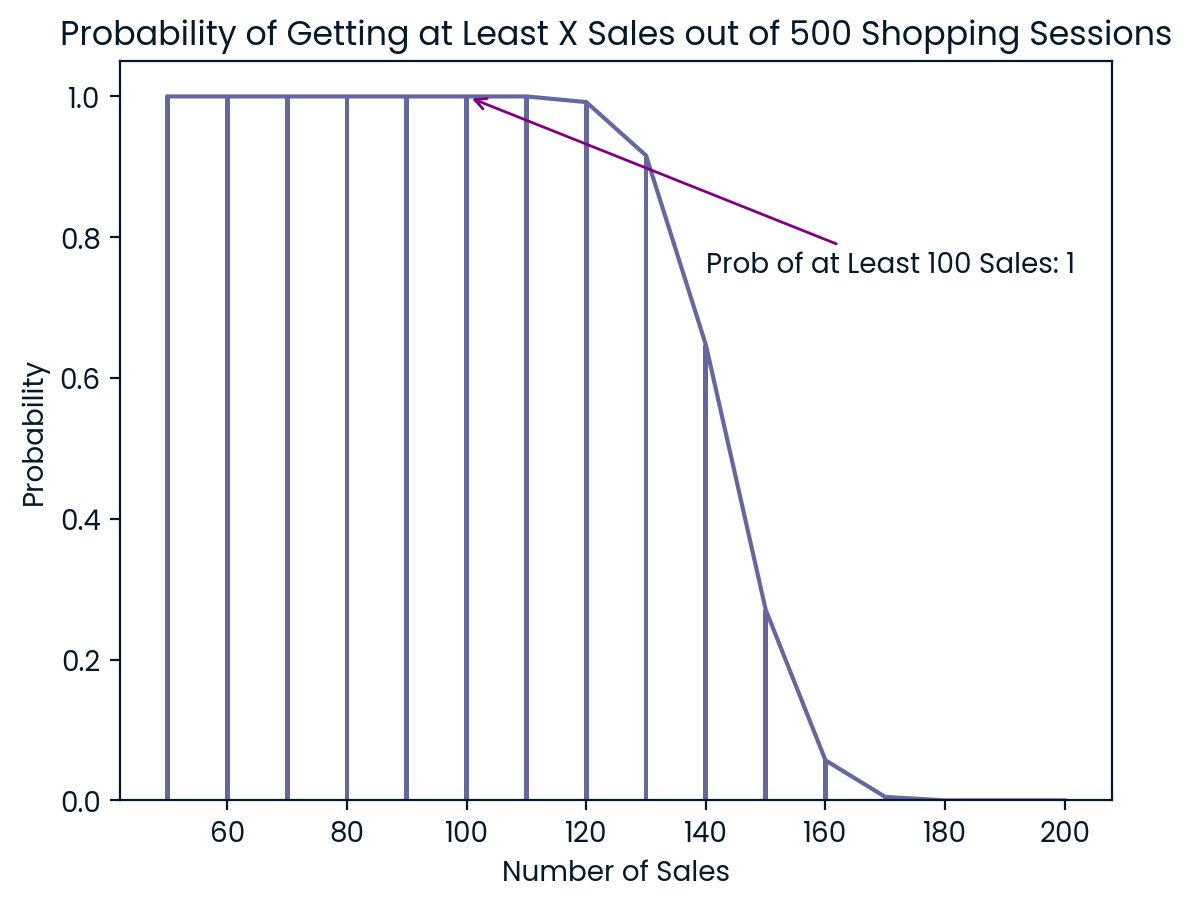

In [182]:
#Plotting a binomial probability distribution of the probability of getting at least x sales out of 500 shopping sessions
p = return_cust_new_rate
r_values = list(np.arange(50, 210, 10))
dist = [round(1 - binom.cdf(r, 500, p), 3) for r in r_values]
plt.plot(r_values, dist)
plt.bar(r_values, dist)
plt.title('Probability of Getting at Least X Sales out of 500 Shopping Sessions')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.annotate('Prob of at Least 100 Sales: 1', xy= (100, 1.0), xytext = (140, 0.75), 
            arrowprops = {'arrowstyle': '->', 'color' : 'Purple'})

print(dist)